## Notebook for TRIEST-Base and TRIEST-Improved implementation


### Imports and reading data

In [1]:
from TriestBase import *
from TriestImproved import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


path = 'dataset/facebook_combined.txt'
ds = pd.read_csv(path, delimiter=' ', header=None)
ds.head()

,0,1
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


### TRIEST-Base

Lets run some triangle estimations with the base algorithm. Since the algorithm is prone to variance, lets run it 10 times. For different values of M.

In [2]:
M = [1000, 10000, 30000]
iterations = 10
all_estimations = []

for m in M:
  estimations = []
  for i in range(iterations):
    TB = TriestBase(m)
    for index, row in ds.iterrows():
      TB.process_edge(*row)
    estimations.append(TB.get_global_triangle_estimate())
  all_estimations.append(estimations)

Running the base algorithm over different values of M for 10 iterations took about 5 minutes on my local PC

The dataset contains 1612010 triangles in total, lets plot our estimated triangle counts for the different values of M.

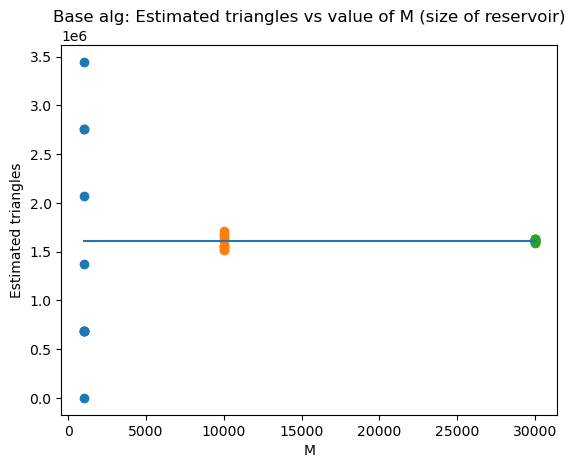

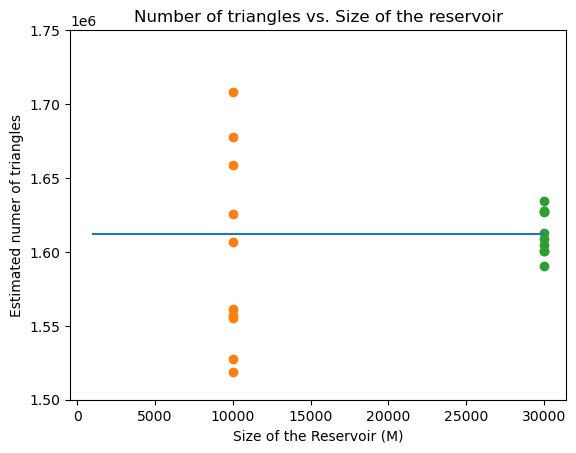

In [ ]:
for i in range(3):
  plt.scatter([M[i]]*10, all_estimations[i])
plt.plot([1000, 30000], [1612010, 1612010])
plt.xlabel('M')
plt.ylabel('Estimated triangles')
plt.title('Base alg: Estimated triangles vs value of M (size of reservoir)')
plt.show()

The plots show that the variance decreases as we increase the size of M. This is expected since when t<=M, the triangle estimations are exact. Increasing M will thus decrease the variance, as variance is introduced when we start sampling edges randomly (the reservoir is filled). However, there is still a lot of variance for the base algorithm. An approach to tackling this problem is to implement the TRIEST-Improved algorithm. This improved algorithm updates counters unconditionally with weighted increments.

## IMPROVED

Lets do the same experiments for our TRIEST-Improved algorithm

In [4]:
M = [1000, 10000, 30000]
iterations = 10
all_improved_estimations = []

for m in M:
  estimations = []
  for i in range(iterations):
    TI = TriestImproved(m)
    for index, row in ds.iterrows():
      TI.process_edge(*row)
    estimations.append(TI.tau_global)
  all_improved_estimations.append(estimations)

### Running the Improved algorithm over different values of M for 10 iterations took about 5 minutes on my local PC.

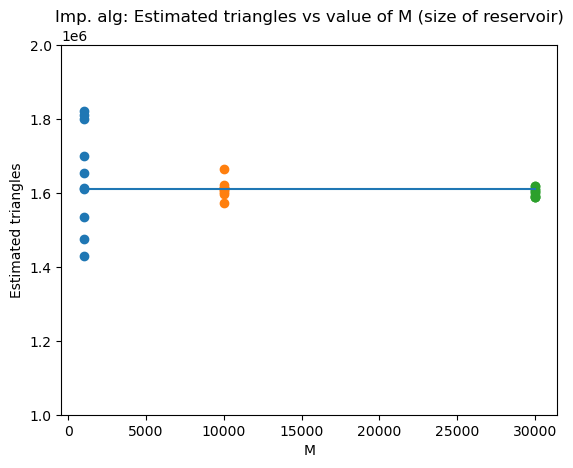

In [5]:

for i in range(3):
  plt.scatter([M[i]]*10, all_improved_estimations[i])
plt.plot([1000, 30000], [1612010, 1612010])
plt.xlabel('M')
plt.ylabel('Estimated triangles')
plt.title('Imp. alg: Estimated triangles vs value of M (size of reservoir)')
plt.ylim(1e6, 2e6)
plt.show()

We can see that variance is reduced significantly for the improved algorithm, even for lower values of M.